# Stock Price Prediction using Python

#### Stock market prediction is the act of trying to determine the future value of company stock or other financial instruments traded on an exchange.

#### The successful prediction of a stock’s future price could yield a significant profit. In this application, we used the LSTM network to predict the closing stock price using the past 60-day stock price.

#### For the application, we used the machine learning technique called Long Short Term Memory (LSTM). LSTM is an artificial recurrent neural network (RNN) architecture used in the field of deep learning.

#### Unlike standard feed-forward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video).


#### LSTM is widely used for the problems of sequence prediction and been very effective

## 1. Importing Modules
#### First step is to import all the necessary modules in the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from tensorflow import keras
import math
from sklearn.preprocessing import MinMaxScaler

#### For the project, we will be using basic modules like numpy, pandas, and matplotlib. In addition to this, we will be using some submodules of keras to create and build our model properly.

#### We would also require the math module for basic calculation and preprocessing module of sklearn to handle the data in a better and simpler way.

## 2. Loading and Preparation of Data

#### For the project we will be using the "Banknifty_5m_data_1_oct" csv file which includes stock data for 3 months and has seven columns which are listed below.

#### 1. Date – Format of date is: “yy-mm-dd”
#### 2. Open – Price of the stock at open market
#### 3. High – Highest price reached in the day
#### 4. Low – Lowest price reached in the day
#### 5. Close – Price of the stock at the close market
#### 6. Adj.Close – the closing price after adjustments for all applicable splits and dividend distributions
####  7.Volume – Number of shares traded

In [2]:
df=pd.read_csv("Banknifty_5m_data_1_oct.csv")
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2022-07-06 09:15:00+05:30,33929.398438,34091.250000,33916.101562,34023.648438,34023.648438,0
1,2022-07-06 09:20:00+05:30,34022.050781,34132.898438,34022.050781,34129.148438,34129.148438,0
2,2022-07-06 09:25:00+05:30,34127.601562,34158.000000,34107.148438,34143.449219,34143.449219,0
3,2022-07-06 09:30:00+05:30,34137.601562,34155.101562,34096.250000,34120.199219,34120.199219,0
4,2022-07-06 09:35:00+05:30,34119.750000,34135.699219,34092.000000,34092.000000,34092.000000,0


# 3. Understanding the Data

## 3.1 Data Summary

In [3]:
print("\nData Summary")
print(" ")
print ("Number of Rows     : " , df.shape[0])
print ("Number of Columns  : " , df.shape[1] ,"\n")
print ("\nFeatures : \n\n" , df.info(),"\n", df.describe())
print ("\nMissing values:\n\n",df.isnull().sum())
print ("\nUnique values :  \n\n",df.nunique())


Data Summary
 
Number of Rows     :  4499
Number of Columns  :  7 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Datetime   4499 non-null   object 
 1   Open       4499 non-null   float64
 2   High       4499 non-null   float64
 3   Low        4499 non-null   float64
 4   Close      4499 non-null   float64
 5   Adj Close  4499 non-null   float64
 6   Volume     4499 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 246.2+ KB

Features : 

 None 
                Open          High           Low         Close     Adj Close  \
count   4499.000000   4499.000000   4499.000000   4499.000000   4499.000000   
mean   38232.863543  38259.840769  38205.939855  38233.823223  38233.823223   
std     1964.348261   1965.959555   1962.130293   1963.918792   1963.918792   
min    33929.398438  34074.750000  33916.101562  33992.148438  

## 3.2 Visualizing the stock data

#### To visualize the data we will be first plotting the date vs close market prices for the  stock for all the data points.


#### To make the visualization simpler, we would be plotting the same plot but for only the first 60 data points.



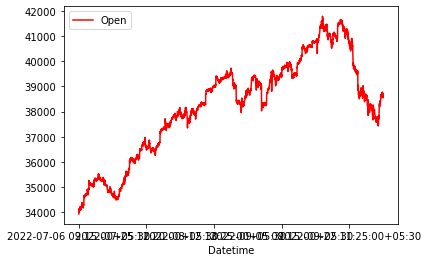

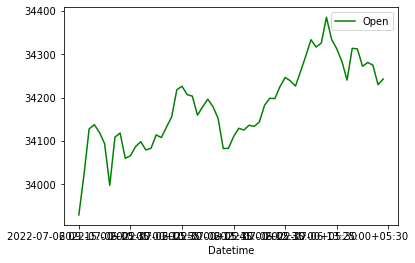

In [4]:
#  Plotting date vs the close market stock price
df.plot('Datetime','Open',color="red")
 
# Extract only top 60 rows to make the plot a little clearer
new_data = df.head(60)
 
#  Plotting date vs the close  market stock price
new_data.plot('Datetime','Open',color="green")
 
plt.show()

# 4. Creating a new Dataframe and Training data

#### To make our study easier we will only consider the closing market price and predict the closing market price using Python. The whole train data preparation is shown in the steps below. Comments are added for your reference.

In [5]:
# 1. Filter out the closing market price data
close_data = df.filter(['Close'])
 
# 2. Convert the data into array for easy evaluation
dataset = close_data.values
 
# 3. Scale/Normalize the data to make all values between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
 
# 4. Creating training data size : 70% of the data
training_data_len = math.ceil(len(dataset) *.7)
train_data = scaled_data[0:training_data_len  , : ]
print(training_data_len)
 
# 5. Separating the data into x and y data
x_train_data=[]
y_train_data =[]
for i in range(60,len(train_data)):
    x_train_data=list(x_train_data)
    y_train_data=list(y_train_data)
    x_train_data.append(train_data[i-60:i,0])
    y_train_data.append(train_data[i,0])
 
    # 6. Converting the training x and y values to numpy arrays
    x_train_data1, y_train_data1 = np.array(x_train_data), np.array(y_train_data)
 
    # 7. Reshaping training s and y data to make the calculations easier
    x_train_data2 = np.reshape(x_train_data1, (x_train_data1.shape[0],x_train_data1.shape[1],1))
   


3150


#### Here we create a data set to train the data that contains the closing price of 60 days ( 60 data points) so that we could do the prediction for the 61st closing price.

#### Now the x_train data set will contain a total of 60 values, the first column will contain from the index of 0 to 59 and the second column from the index of 1 to 60, and so on

#### The y_train data set will contain the 61st value at its first column located at index 60 and for the second column, it will contain the 62nd value located at index 61 and so on.

#### Converting both the independent and dependent train data set as x_train_data and y_train_data respectively, into the NumPy arrays so that they can be used to train the LSTM model.

#### Also, as the LSTM model is expecting the data in 3-dimensional data set, using reshape() function we will reshape the data in the form of 3-dimension.

# 5. Building LSTM Model

#### The LSTM model will have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with one neuron.

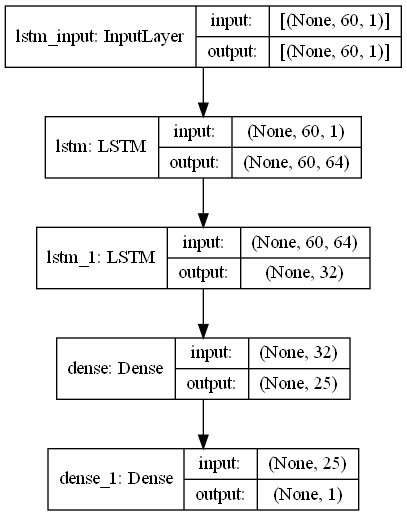

In [6]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(x_train_data2.shape[1],1), return_sequences=True))
model.add(LSTM(32,  activation='relu', return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
plot_model(model, show_shapes=True, show_layer_names=True)

# 6. Compiling the Model
#### The LSTM model is compiled using the mean squared error (MSE) loss function and the adam optimizer.

In [7]:
opt = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam")
model.compile(optimizer=opt, loss='mean_squared_error')
model.fit(x_train_data2, y_train_data1, batch_size=1, epochs=1)



3090/3090 [==============================] - 68s 21ms/step - loss: 0.0020


#### Using the fit() function which is another name for train, we are training the data sets. Here, batch_size is the total number of training examples present in the single batch, and epochs are the number of iterations when an entire data set is passed forward and backward through the neural network.

# 7. Testing the model on testing data

#### The code below will get all the rows above the training_data_len from the column of the closing price. Then convert the x_test data set into the NumPy arrays so that they can be used to train the LSTM model.

#### As the LSTM model is expecting the data in 3-dimensional data set, using reshape() function we will reshape the data set in the form of 3-dimension.

#### Using the predict() function, get the predicted values from the model using the test data. And scaler.inverse_transform() function is undoing the scaling.

In [8]:
# 1. Creating a dataset for testing
test_data = scaled_data[training_data_len - 60: , : ]
x_test = []
y_test =  dataset[training_data_len : , : ]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
 
# 2.  Convert the values into arrays for easier computation
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
 
# 3. Making predictions on the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# 8. Error Calculation
#### RMSE is the root mean squared error, which helps to measure the accuracy of the model.

In [9]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

139.63100867572442


#### The lower the value, the better the model performs. The 0 value indicates the model’s predicted values match the actual values from the test data set perfectly.


#### rmse value we received was 139.63100867572442 the model need to be tuned more to get the value lower.

# 9. Make Predictions

#### The final step is to plot and visualize the data. To visualize the data we use these basic functions like title, label, plot as per how we want our graph to look like

C:\Users\User\AppData\Local\Temp\ipykernel_2008\3650764946.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


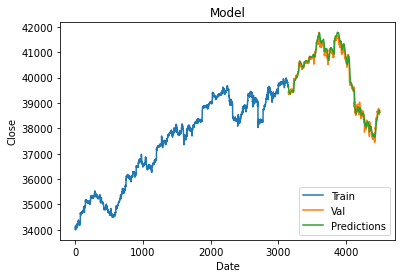

In [10]:
train = df[:training_data_len]
valid = df[training_data_len:]
 
valid['Predictions'] = predictions
 
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close')
 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
 
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
 
plt.show()

# Conclusion

####  we learned how to predict stock prices using an LSTM model! And the values for actual (close) and predicted (predictions) prices needs  improvements.